In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

DATA LOADING

In [81]:
data = pd.read_csv('MC CRASHES DATA FINAL AL 2.csv')
data.head()

,Crash Number,Day of the Week,Day,Time of Day,Time,Place,Controlled Access,Access,Manner of Crash,Crash Manner,...,Lighting Conditions,Light Conditions,Weather,Weather C,CU Roadway Condition,Roadway Condition,CU Roadway Curvature and Grade,Roadway Curvature,Latitude,Longitude
0,600073,Wednesday,Weekday,3:00 PM to 3:59 PM,Off-Peak Hour,Rural,Not a Controlled Access,Not Controlled,Single Vehicle Crash (all types),Single Vehicle Crash,...,Daylight,Daylight,Cloudy,Foggy,Dry,Dry,Straight with Down Grade,Straight,33.657067,-86.268114
1,600101,Wednesday,Weekday,3:00 PM to 3:59 PM,Off-Peak Hour,Urban,Not a Controlled Access,Not Controlled,Rear End (front to rear),Rear-End,...,Daylight,Daylight,Clear,Clear,Dry,Dry,Straight and Level,Straight,33.453778,-87.012370
2,601177,Saturday,Weekend,3:00 PM to 3:59 PM,Off-Peak Hour,Rural,Not a Controlled Access,Not Controlled,Single Vehicle Crash (all types),Single Vehicle Crash,...,Daylight,Daylight,Clear,Clear,Dry,Dry,Curve Left and Down Grade,Curve,30.742780,-87.889280
3,601310,Saturday,Weekend,6:00 PM to 6:59 PM,Off-Peak Hour,Urban,Not a Controlled Access,Not Controlled,Angle (front to side) Opposite Direction,Angular,...,Dusk,Dark,Cloudy,Foggy,CU is Unknown,Dry,CU is Unknown,Curve,30.628985,-88.088910
4,601108,Saturday,Weekend,11:00 AM to 11:59 AM,Off-Peak Hour,Rural,Not a Controlled Access,Not Controlled,Single Vehicle Crash (all types),Single Vehicle Crash,...,Daylight,Daylight,Clear,Clear,Dry,Dry,Curve Left and Level,Curve,34.057063,-86.860597


In [83]:
x = data[['Day ', 'Time ', 'Place', 'Access ', 'Crash Manner', 'Intersection Relationship', 'Intersection Location', 'Functional Class', 'Light Conditions ', 'Weather C', 'Roadway Condition', 'Roadway Curvature', 'Latitude', 'Longitude']]

In [85]:
y = data['Crash Severity']

In [87]:
#Descriptive Statistics
data.describe()
data['Crash Severity'].value_counts()  # Frequency of different crash severities

Crash Severity
Non-Incapacitating Injury    2100
Property Damage Only         1964
Suspected Serious Injury     1885
Possible Injury               779
Fatal Injury                  417
Name: count, dtype: int64

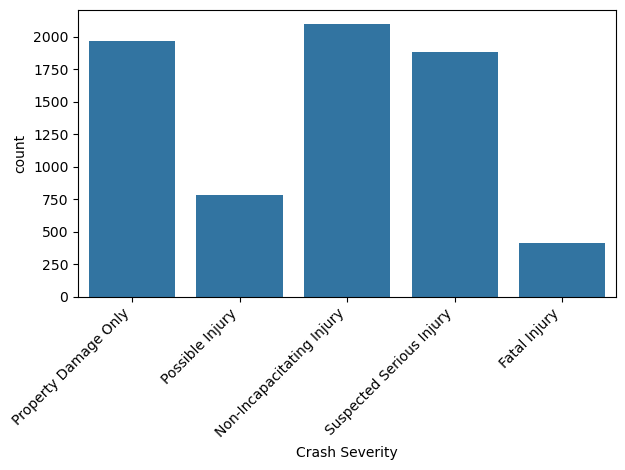

In [89]:
#Data Visualization
severity_order = ['Property Damage Only', 'Possible Injury', 'Non-Incapacitating Injury', 'Suspected Serious Injury', 'Fatal Injury']
sns.countplot(x='Crash Severity', data=data, order=severity_order)
plt.xticks(rotation=45, ha='right') # rotate x-axis labels
plt.tight_layout()# Adjust subplot parameters for a tight layout.
plt.show()

In [91]:
severity_order = ['Property Damage Only', 'Possible Injury', 'Non-Incapacitating Injury', 'Suspected Serious Injury', 'Fatal Injury']
data['Crash Severity'] = pd.Categorical(data['Crash Severity'], categories=severity_order, ordered=True)


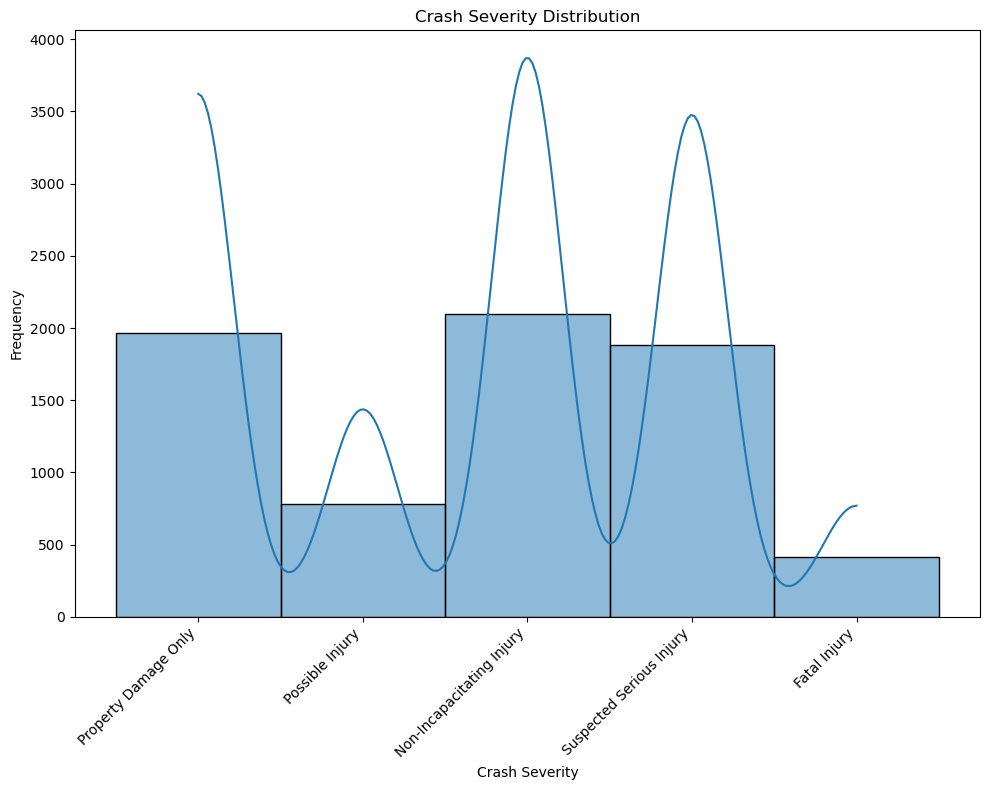

In [93]:
plt.figure(figsize=(10,8))
sns.histplot(x='Crash Severity', data=data, kde=True)
plt.title('Crash Severity Distribution')
plt.xlabel('Crash Severity')
plt.ylabel('Frequency')

plt.xticks(severity_order, rotation=45, ha='right')
plt.tight_layout()
plt.show()

DESCRIPTIVE STATISTICS

In [96]:
data.describe()
data['Day '].value_counts() 

Day 
Weekday    4460
Weekend    2685
Name: count, dtype: int64

In [98]:
data.describe()
data['Time '].value_counts() 


Time 
Off-Peak Hour    4367
Peak Hour        2778
Name: count, dtype: int64

In [100]:
data.describe()
data['Place'].value_counts() 

Place
Urban    4338
Rural    2807
Name: count, dtype: int64

In [102]:
data.describe()
data['Access '].value_counts() 

Access 
Not Controlled    5870
 Controlled       1275
Name: count, dtype: int64

In [104]:
data.describe()
data['Crash Manner'].value_counts() 

Crash Manner
Single Vehicle Crash    2832
Rear-End                1324
Sides                   1302
Angular                 1158
Other                    196
Head-On                  178
Non-Collision            155
Name: count, dtype: int64

In [106]:
data.describe()
data['Intersection Relationship'].value_counts() 

Intersection Relationship
Not Intersection Related    5347
Intersection Related        1798
Name: count, dtype: int64

In [108]:
data.describe()
data['Intersection Location'].value_counts() 

Intersection Location
At an Intersection        3662
Not at an Intersection    3483
Name: count, dtype: int64

In [110]:
data.describe()
data['Functional Class'].value_counts() 

Functional Class
Principal Arterial - Other                            1871
Minor Arterial                                        1598
Major Collector                                       1403
Local                                                 1324
Interstate                                             554
Null value                                             177
Minor Collector                                        172
Principal Arterial - Other Freeways or Expressways      46
Name: count, dtype: int64

In [150]:
# Define the desired categories
desired_categories = ['Interstate', 'Principal Arterial', 'Minor Arterial', 'Major Collector', 'Minor Collector', 'Local']

# Create a mapping dictionary to combine 'Principal Arterial' categories
category_mapping = {
    'Principal Arterial - Other': 'Principal Arterial',
    'Principal Arterial - Other Freeways or Expressways': 'Principal Arterial'
}

# Apply the mapping to the 'Functional Class' column
data['Functional Class'] = data['Functional Class'].replace(category_mapping)

# Replace 'Null value' with 'Local'
data['Functional Class'] = data['Functional Class'].replace('Null value', 'Local')

# Filter for desired categories (including the combined 'Principal Arterial')
data = data[data['Functional Class'].isin(desired_categories)]

# Check the updated frequency
print(data['Functional Class'].value_counts())

Functional Class
Minor Arterial     1598
Major Collector    1403
Local              1324
Interstate          554
Minor Collector     172
Name: count, dtype: int64


In [138]:
print(data['Functional Class'].unique())

['Local' 'Minor Arterial' 'Major Collector' 'Interstate' 'Minor Collector']


In [112]:
data.describe()
data['Light Conditions '].value_counts() 

Light Conditions 
Daylight    4935
Dark        2210
Name: count, dtype: int64

In [114]:
data.describe()
data['Weather C'].value_counts() 

Weather C
Clear             5808
Foggy             1114
Precipitation      210
Unknown/Other        8
Severe Weather       5
Name: count, dtype: int64

In [116]:
desired_categories = ['Clear', 'Foggy', 'Precipitation', 'Severe Weather']

category_mapping = {
    'Clear': 'Clearl',
    'Foggy': 'Foggy',  
    'Precipitation': 'Precipitation',
    'Severe Weather': 'Severe Weather'
}

data['Weather C'] = data['Weather C'].replace('Unknown/Other', 'Clear') 

data = data[data['Weather C'].isin(desired_categories)] # Filter for desired categories

# Check the updated frequency
print(data['Weather C'].value_counts())

Weather C
Clear             5816
Foggy             1114
Precipitation      210
Severe Weather       5
Name: count, dtype: int64


In [118]:
data.describe()
data['Roadway Condition'].value_counts()

Roadway Condition
Dry    6738
Wet     407
Name: count, dtype: int64

In [120]:
data.describe()
data['Roadway Curvature'].value_counts()

Roadway Curvature
Straight    5358
Curve       1787
Name: count, dtype: int64

In [21]:
xy_data = pd.concat([x, y], axis=1)

In [23]:
xy_data.head()

,Day,Time,Place,Access,Crash Manner,Intersection Relationship,Intersection Location,Functional Class,Light Conditions,Weather C,Roadway Condition,Roadway Curvature,Latitude,Longitude,Crash Severity
0,Weekday,Off-Peak Hour,Rural,Not Controlled,Single Vehicle Crash,Intersection Related,At an Intersection,Local,Daylight,Foggy,Dry,Straight,33.657067,-86.268114,Possible Injury
1,Weekday,Off-Peak Hour,Urban,Not Controlled,Rear-End,Not Intersection Related,Not at an Intersection,Minor Arterial,Daylight,Clear,Dry,Straight,33.453778,-87.012370,Property Damage Only
2,Weekend,Off-Peak Hour,Rural,Not Controlled,Single Vehicle Crash,Not Intersection Related,Not at an Intersection,Major Collector,Daylight,Clear,Dry,Curve,30.742780,-87.889280,Property Damage Only
3,Weekend,Off-Peak Hour,Urban,Not Controlled,Angular,Intersection Related,At an Intersection,Principal Arterial - Other,Dark,Foggy,Dry,Curve,30.628985,-88.088910,Suspected Serious Injury
4,Weekend,Off-Peak Hour,Rural,Not Controlled,Single Vehicle Crash,Not Intersection Related,Not at an Intersection,Major Collector,Daylight,Clear,Dry,Curve,34.057063,-86.860597,Non-Incapacitating Injury


THE MODEL

In [ ]:
!pip install statsmodels --upgrade
import statsmodels.formula.api as sm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [ ]:
X = data[['Day ', 'Time ', 'Place', 'Access ', 'Crash Manner', 'Intersection Relationship', 'Intersection Location', 'Functional Class', 'Light Conditions ', 'Weather C', 'Roadway Condition', 'Roadway Curvature']]
y = data['Crash Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

In [ ]:
# Fit the encoder on the training data and transform both training and testing data
X_encoded = encoder.fit_transform(X)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[['Property Damage Only', 'Possible Injury', 'Non-Incapacitating Injury', 'Suspected Serious Injury', 'Fatal Injury']])
y_train_encoded = ordinal_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_encoded = ordinal_encoder.transform(y_test.values.reshape(-1, 1)).ravel()
y_encoded = ordinal_encoder.fit_transform(y.values.reshape(-1, 1)).ravel()

In [ ]:
print(X_encoded.shape)
print(type(X_encoded))

(7145, 38)
<class 'numpy.ndarray'>


In [ ]:
X_encoded

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [ ]:
y_encoded.shape

(7145,)

In [ ]:
y_encoded

array([1., 0., 0., ..., 4., 4., 4.])

In [ ]:
# Check for constant columns in X_train_encoded
constant_cols = [col for col in range(X_train_encoded.shape[1]) if np.all(X_train_encoded[:, col] == X_train_encoded[0, col])]

# Drop constant columns from X_train_encoded and X_test_encoded
X_train_encoded = np.delete(X_train_encoded, constant_cols, axis=1)
X_test_encoded = np.delete(X_test_encoded, constant_cols, axis=1)

In [ ]:
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first') # sparse=False for dense output, drop='first' to drop one category per feature

# Fit the encoder on the training data and transform both training and testing data
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Check for constant columns in X_train_encoded and drop
constant_cols = [col for col in range(X_train_encoded.shape[1]) if np.all(X_train_encoded[:, col] == X_train_encoded[0, col])]
X_train_encoded = np.delete(X_train_encoded, constant_cols, axis=1)
X_test_encoded = np.delete(X_test_encoded, constant_cols, axis=1)

LOGIT

In [ ]:
# Create and fit the OrderedModel
mod_log_logit = OrderedModel(y_train_encoded, X_train_encoded, distr='logit')
res_log_logit = mod_log_logit.fit(method='bfgs', disp=False)

MODEL EVALUATION

In [ ]:
# Get feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(X_train.columns)

# Create DataFrames for encoded data with consistent columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

# Align columns, adding missing columns with 0 values
X_train_encoded_aligned, X_test_encoded_aligned = X_train_encoded_df.align(X_test_encoded_df, join='left', fill_value=0)

# Convert back to NumPy arrays
X_train_encoded_aligned = X_train_encoded_aligned.to_numpy()
X_test_encoded_aligned = X_test_encoded_aligned.to_numpy()

#Check and drop constant cols - Apply to both train and test with the same mask.
constant_cols_mask = np.all(X_train_encoded_aligned == X_train_encoded_aligned[0, :], axis=0)
X_train_encoded_aligned = X_train_encoded_aligned[:X_train.shape[0], :]
X_test_encoded_aligned = X_test_encoded_aligned[:X_test.shape[0], :]

In [ ]:
# Evaluate model
model = res_log_logit
y_train_pred = model.predict(X_train_encoded_aligned)
y_test_pred = model.predict(X_test_encoded_aligned)

# Convert predicted probabilities to class labels
y_train_pred_class = np.argmax(y_train_pred, axis=1)
y_test_pred_class = np.argmax(y_test_pred, axis=1)

y_test_encoded_aligned = ordinal_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Calculate accuracy
train_accuracy = accuracy_score(y_train_encoded, y_train_pred_class)
test_accuracy = accuracy_score(y_test_encoded_aligned, y_test_pred_class)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(res_log_logit.params)

Train Accuracy: 0.3576
Test Accuracy: 0.2638
[ 0.04800629 -0.0126628  -0.46131222  0.18235019  0.72034209 -0.53265368
 -0.29843902 -0.80922792 -0.1436923   0.13426727 -0.13541007  0.16930453
 -0.27530964 -0.22062759 -0.05003798 -0.39983036 -0.36633727  0.0616479
  0.07685791 -0.33492343  0.15046551  0.1938716  -0.25836941 -0.56843939
 -0.35747765 -0.14781596 -1.74110676 -0.63497037  0.26004037  0.74685145]


In [ ]:
#performance metrics
from sklearn.metrics import mean_absolute_error, cohen_kappa_score
from scipy.stats import kendalltau

y_true = y_encoded
X_encoded = encoder.transform(X)
y_pred = model.predict(X_encoded)
y_pred_class = np.argmax(y_pred, axis=1)
# Calculate metrics
mae = mean_absolute_error(y_true, y_pred_class)
tau, _ = kendalltau(y_true, y_pred_class)
qwk = cohen_kappa_score(y_true, y_pred_class, weights='quadratic')

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Kendall's Tau: {tau:.4f}")
print(f"Quadratic Weighted Kappa: {qwk:.4f}")

Mean Absolute Error: 1.1156
Kendall's Tau: 0.2229
Quadratic Weighted Kappa: 0.2609


In [ ]:
#cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, cohen_kappa_score
from scipy.stats import kendalltau

# Define a custom scorer for ordinal regression
def ordinal_scorer(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    tau, _ = kendalltau(y_true, y_pred)
    qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    # Avoid division by zero if mae is 0
    return (tau + qwk) / 2 if mae == 0 else (1 / mae) * (tau + qwk) / 2

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the encoder on the training data and transform both training and testing data for this fold
    X_train_encoded = encoder.fit_transform(X_train)
    X_test_encoded = encoder.transform(X_test)


    # Predict and evaluate
    y_pred = res_log_logit.predict(X_test_encoded)
    y_pred_class = np.argmax(y_pred, axis=1)
    score = ordinal_scorer(ordinal_encoder.transform(y_test.values.reshape(-1, 1)).ravel(), y_pred_class)
    scores.append(score)

print(f"Cross-validation scores: {scores}")
print(f"Mean score: {np.mean(scores):.4f} (+/- {np.std(scores) * 2:.4f})")

Cross-validation scores: [np.float64(0.24295573077340568), np.float64(0.20335780522094174), np.float64(0.21199838847346275), np.float64(0.21686278938203038), np.float64(0.2091695916685394)]
Mean score: 0.2169 (+/- 0.0275)


In [ ]:
# Print coefficients and cut points
for i, param in enumerate(model.params):
    if i < len(X.columns):
        print(f"{X.columns[i]}: {param:.4f}")  # Print coefficients
    else:
        print(f"Cut Point {i - len(X.columns) + 1}: {param:.4f}")  # Print cut points

Day : 0.0480
Time : -0.0127
Place: -0.4613
Access : 0.1824
Crash Manner: 0.7203
Intersection Relationship: -0.5327
Intersection Location: -0.2984
Functional Class: -0.8092
Light Conditions : -0.1437
Weather C: 0.1343
Roadway Condition: -0.1354
Roadway Curvature: 0.1693
Cut Point 1: -0.2753
Cut Point 2: -0.2206
Cut Point 3: -0.0500
Cut Point 4: -0.3998
Cut Point 5: -0.3663
Cut Point 6: 0.0616
Cut Point 7: 0.0769
Cut Point 8: -0.3349
Cut Point 9: 0.1505
Cut Point 10: 0.1939
Cut Point 11: -0.2584
Cut Point 12: -0.5684
Cut Point 13: -0.3575
Cut Point 14: -0.1478
Cut Point 15: -1.7411
Cut Point 16: -0.6350
Cut Point 17: 0.2600
Cut Point 18: 0.7469


PROBIT

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

#Check and drop constant cols
constant_cols = [col for col in range(X_train_encoded.shape[1]) if np.all(X_train_encoded[:, col] == X_train_encoded[0, col])]
X_train_encoded = np.delete(X_train_encoded, constant_cols, axis=1)
X_test_encoded = np.delete(X_test_encoded, constant_cols, axis=1)

ordinal_encoder = OrdinalEncoder(categories=[['Property Damage Only', 'Possible Injury', 'Non-Incapacitating Injury', 'Suspected Serious Injury', 'Fatal Injury']])
y_train_encoded = ordinal_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [ ]:
# Create and fit the OrderedModel (using the encoded data)
mod_log_probit = OrderedModel(y_train_encoded, X_train_encoded_aligned, distr='probit')
res_log_probit = mod_log_probit.fit(method='bfgs', disp=False)

In [ ]:
# Get feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(X_train.columns)

# Create DataFrames for encoded data with consistent columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

# Align columns, adding missing columns with 0 values
X_train_encoded_aligned, X_test_encoded_aligned = X_train_encoded_df.align(X_test_encoded_df, join='left', fill_value=0)

# Convert back to NumPy arrays
X_train_encoded_aligned = X_train_encoded_aligned.to_numpy()
X_test_encoded_aligned = X_test_encoded_aligned.to_numpy()

#Check and drop constant cols - Apply to both train and test with the same mask.
constant_cols_mask = np.all(X_train_encoded_aligned == X_train_encoded_aligned[0, :], axis=0)
X_train_encoded_aligned = X_train_encoded_aligned[:X_train.shape[0], :]
X_test_encoded_aligned = X_test_encoded_aligned[:X_test.shape[0], :]

In [ ]:
# Evaluate model
model = res_log_probit
y_train_pred = model.predict(X_train_encoded_aligned)
y_test_pred = model.predict(X_test_encoded_aligned)

# Convert predicted probabilities to class labels
y_train_pred_class = np.argmax(y_train_pred, axis=1)
y_test_pred_class = np.argmax(y_test_pred, axis=1)

y_test_encoded_aligned = ordinal_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Calculate accuracy
train_accuracy = accuracy_score(y_train_encoded, y_train_pred_class)
test_accuracy = accuracy_score(y_test_encoded_aligned, y_test_pred_class)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(res_log_probit.params)

Train Accuracy: 0.3564
Test Accuracy: 0.2638
[ 0.0301347  -0.01065345 -0.26905786  0.11970339  0.40802118 -0.35815776
 -0.19093872 -0.48219981 -0.08687288  0.06299489 -0.09393262  0.09798248
 -0.19187074 -0.15234955 -0.06166559 -0.26859095 -0.26152576  0.00755316
  0.03344503 -0.20536795  0.09344605  0.13873091 -0.05966233 -0.25612911
 -0.21772815 -0.08972326 -1.08706563 -1.14258353 -0.22883796  0.14770579]


In [ ]:
#performance metrics
from sklearn.metrics import mean_absolute_error, cohen_kappa_score
from scipy.stats import kendalltau

y_true = y_encoded
X_encoded = encoder.transform(X)
y_pred = model.predict(X_encoded)
y_pred_class = np.argmax(y_pred, axis=1)
# Calculate metrics
mae = mean_absolute_error(y_true, y_pred_class)
tau, _ = kendalltau(y_true, y_pred_class)
qwk = cohen_kappa_score(y_true, y_pred_class, weights='quadratic')

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Kendall's Tau: {tau:.4f}")
print(f"Quadratic Weighted Kappa: {qwk:.4f}")

Mean Absolute Error: 1.1213
Kendall's Tau: 0.2220
Quadratic Weighted Kappa: 0.2584


In [ ]:
#cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, cohen_kappa_score
from scipy.stats import kendalltau

# Define a custom scorer for ordinal regression
def ordinal_scorer(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    tau, _ = kendalltau(y_true, y_pred)
    qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    # Avoid division by zero if mae is 0
    return (tau + qwk) / 2 if mae == 0 else (1 / mae) * (tau + qwk) / 2

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the encoder on the training data and transform both training and testing data for this fold
    X_train_encoded = encoder.fit_transform(X_train)
    X_test_encoded = encoder.transform(X_test)


    # Predict and evaluate
    y_pred = res_log_probit.predict(X_test_encoded)
    y_pred_class = np.argmax(y_pred, axis=1)
    score = ordinal_scorer(ordinal_encoder.transform(y_test.values.reshape(-1, 1)).ravel(), y_pred_class)
    scores.append(score)

print(f"Cross-validation scores: {scores}")
print(f"Mean score: {np.mean(scores):.4f} (+/- {np.std(scores) * 2:.4f})")

Cross-validation scores: [np.float64(0.24142455055610623), np.float64(0.20196693901909554), np.float64(0.20349808404571945), np.float64(0.22306673921510906), np.float64(0.20134516564301697)]
Mean score: 0.2143 (+/- 0.0316)


In [ ]:
# Print coefficients and cut points
for i, param in enumerate(model.params):
    if i < len(X.columns):
        print(f"{X.columns[i]}: {param:.4f}")  # Print coefficients
    else:
        print(f"Cut Point {i - len(X.columns) + 1}: {param:.4f}")  # Print cut points

Day : 0.0301
Time : -0.0107
Place: -0.2691
Access : 0.1197
Crash Manner: 0.4080
Intersection Relationship: -0.3582
Intersection Location: -0.1909
Functional Class: -0.4822
Light Conditions : -0.0869
Weather C: 0.0630
Roadway Condition: -0.0939
Roadway Curvature: 0.0980
Cut Point 1: -0.1919
Cut Point 2: -0.1523
Cut Point 3: -0.0617
Cut Point 4: -0.2686
Cut Point 5: -0.2615
Cut Point 6: 0.0076
Cut Point 7: 0.0334
Cut Point 8: -0.2054
Cut Point 9: 0.0934
Cut Point 10: 0.1387
Cut Point 11: -0.0597
Cut Point 12: -0.2561
Cut Point 13: -0.2177
Cut Point 14: -0.0897
Cut Point 15: -1.0871
Cut Point 16: -1.1426
Cut Point 17: -0.2288
Cut Point 18: 0.1477
